# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [1]:
import pandas as pd

bank = pd.read_csv('./data/bank.csv')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [2]:
bank.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [3]:
bank.shape

(41188, 20)

In [4]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
# get percentage of minority class
percentage = bank['y'].value_counts()[1] / bank.shape[0]

print(f'the percentage of minority class is: {percentage*100:.2f}%')

the percentage of minority class is: 11.27%


In [6]:
# Overall null percentages
bank.isnull().sum() / bank.shape[0]

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [8]:
bank.default.value_counts()

0.0    32588
1.0        3
Name: default, dtype: int64

##### Categorical Variables

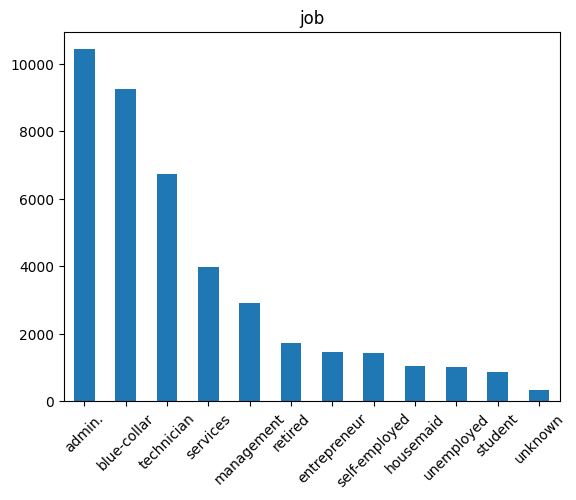

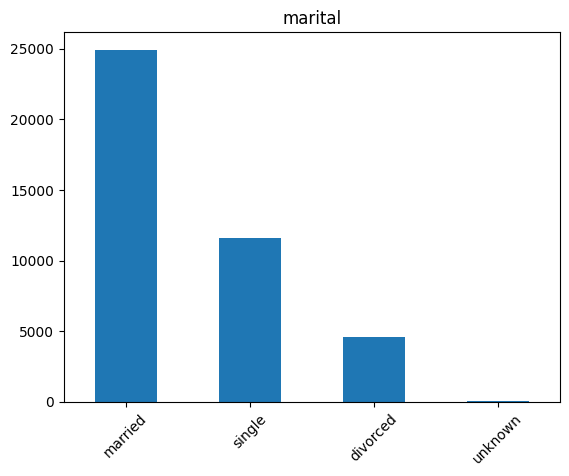

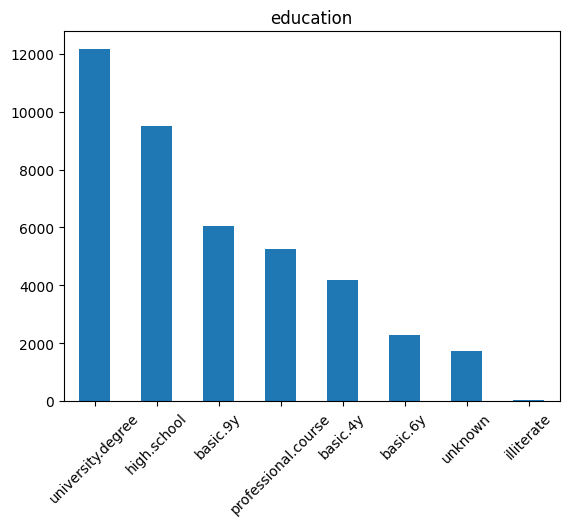

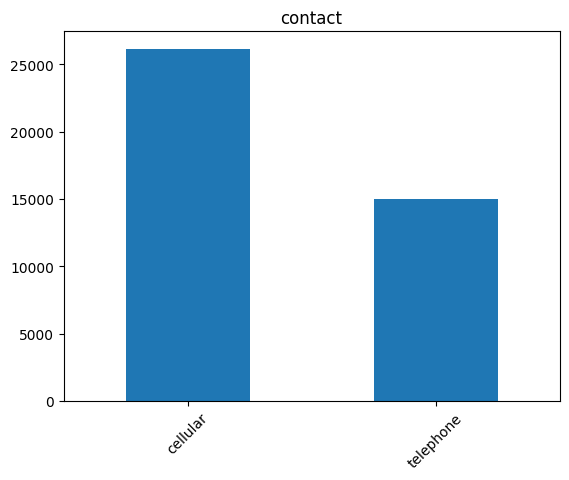

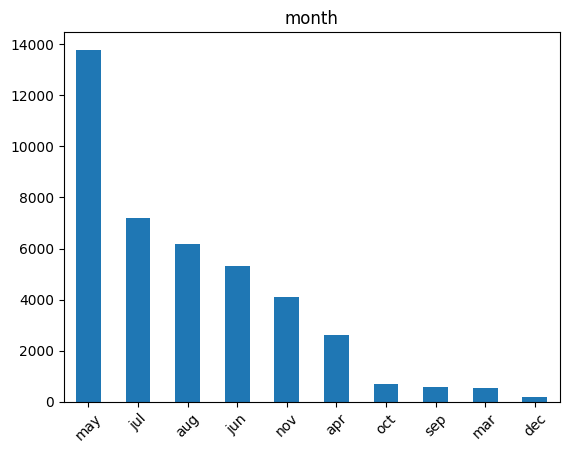

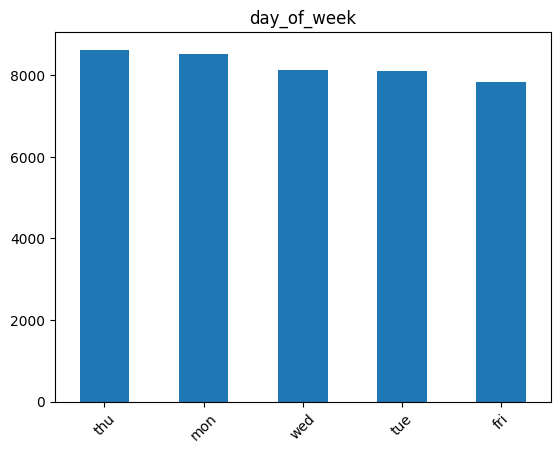

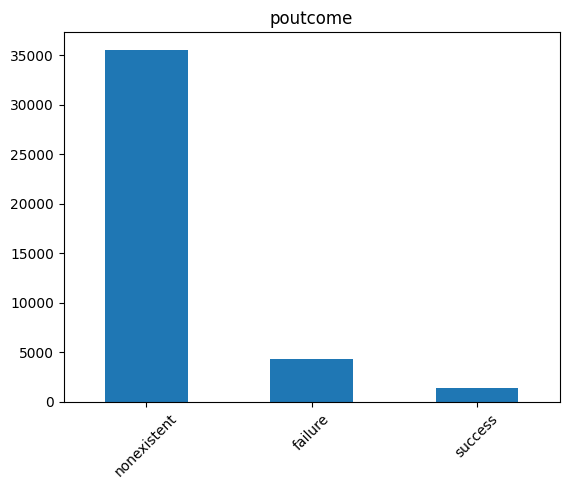

In [9]:
import matplotlib.pyplot as plt
# select categorical variables
categorical = bank.select_dtypes(include=['object']).columns

# plot bar charts for categorical variables
for col in categorical:
    bank[col].value_counts().plot(kind='bar')
    plt.title(col)
    # rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.show()

In [10]:
column = 'job'
variable = 'unknown'
percentage = len(bank[bank[column]=='unknown']) / bank.shape[0]

print(f'there are {percentage*100:.2f}% of {variable} values in the {column} column')

there are 0.80% of unknown values in the job column


In [11]:
column = 'marital'
variable = 'unknown'
percentage = len(bank[bank[column]==variable]) / bank.shape[0]

print(f'there are {percentage*100:.2f}% of {variable} values in the {column} column')

there are 0.19% of unknown values in the marital column


In [12]:
column = 'education'
variable = 'illiterate'
percentage = len(bank[bank[column]==variable]) / bank.shape[0]

print(f'there are {percentage*100:.2f}% of {variable} values in the {column} column')

there are 0.04% of illiterate values in the education column


##### Numerical variables

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'default'}>,
        <AxesSubplot: title={'center': 'housing'}>,
        <AxesSubplot: title={'center': 'loan'}>],
       [<AxesSubplot: title={'center': 'campaign'}>,
        <AxesSubplot: title={'center': 'pdays'}>,
        <AxesSubplot: title={'center': 'previous'}>,
        <AxesSubplot: title={'center': 'emp.var.rate'}>],
       [<AxesSubplot: title={'center': 'cons.price.idx'}>,
        <AxesSubplot: title={'center': 'cons.conf.idx'}>,
        <AxesSubplot: title={'center': 'euribor3m'}>,
        <AxesSubplot: title={'center': 'nr.employed'}>],
       [<AxesSubplot: title={'center': 'y'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

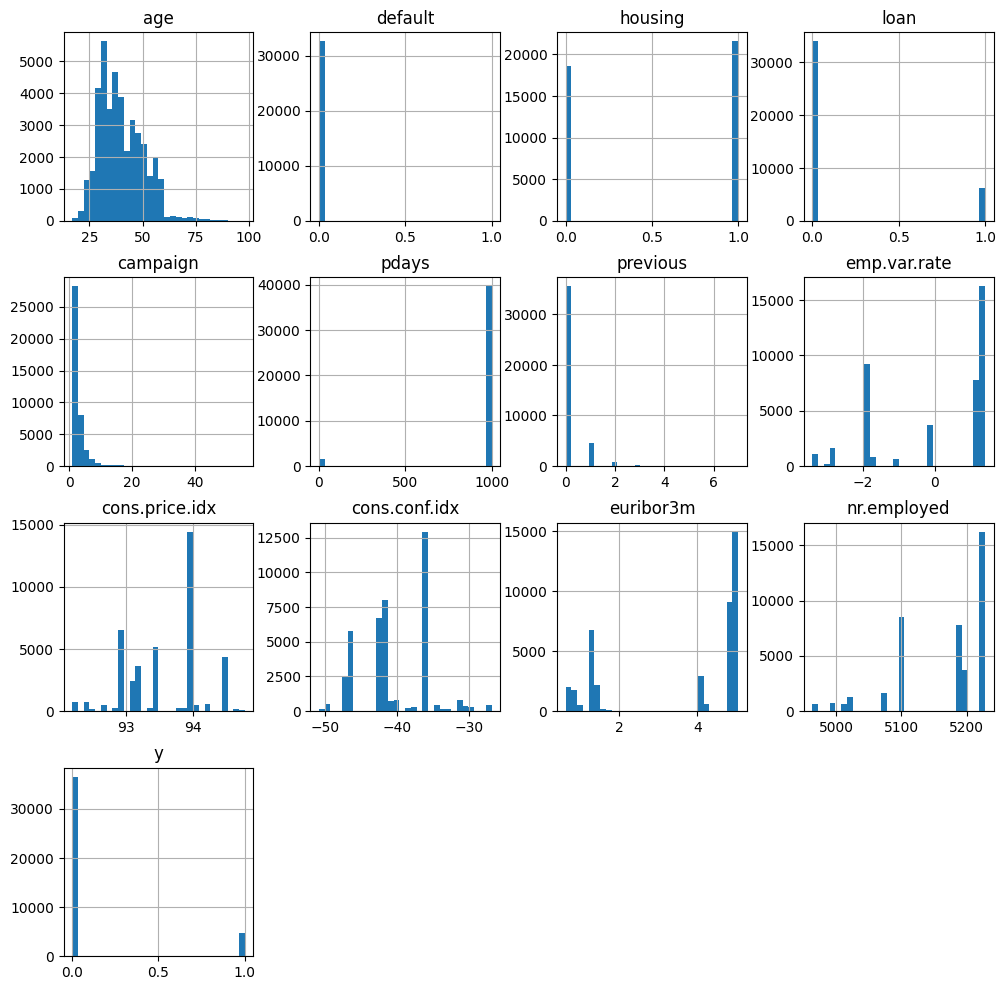

In [13]:
# select numerical variables
numerical = [var for var in bank.columns if bank[var].dtypes != 'O']

# plot histogram for numerical variables
bank[numerical].hist(bins=30, figsize=(12,12))

Seems like the same data have null values for housing and loans. Dropping these null values might help balance the datasets slightly as well

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

In [14]:
# drop the above mentioned categorical variables
bank = bank[bank['job'] != 'unknown']
bank = bank[bank['marital'] != 'unknown']
bank = bank[bank['education'] != 'illiterate']

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [15]:
variable = 'default'
nulls = bank[variable].isnull().value_counts()[1]

percentage = nulls / bank.shape[0]

# get percentage of minority class
decimal = bank[bank[variable].isnull()]['y'].value_counts()[1] / bank[bank[variable].isnull()].shape[0]

print(f'the number of null values in the {variable} variable is: {nulls} which is around {percentage*100:.2f}% of the dataset')
print(f'around {decimal*100:.2f}% of the {variable} variable null values are in the minority class')

the number of null values in the default variable is: 8429 which is around 20.68% of the dataset
around 5.16% of the default variable null values are in the minority class


In [16]:
variable = 'housing'
nulls = bank[variable].isnull().value_counts()[1]

percentage = nulls / bank.shape[0]

# get percentage of minority class
decimal = bank[bank[variable].isnull()]['y'].value_counts()[1] / bank[bank[variable].isnull()].shape[0]

print(f'the number of null values in the {variable} variable is: {nulls} which is around {percentage*100:.2f}% of the dataset')
print(f'around {decimal*100:.2f}% of the {variable} variable null values are in the minority class')

the number of null values in the housing variable is: 984 which is around 2.41% of the dataset
around 10.87% of the housing variable null values are in the minority class


In [17]:
variable = 'loan'
nulls = bank[variable].isnull().value_counts()[1]

percentage = nulls / bank.shape[0]

# get percentage of minority class
decimal = bank[bank[variable].isnull()]['y'].value_counts()[1] / bank[bank[variable].isnull()].shape[0]

print(f'the number of null values in the {variable} variable is: {nulls} which is around {percentage*100:.2f}% of the dataset')
print(f'around {decimal*100:.2f}% of the {variable} variable null values are in the minority class')

the number of null values in the loan variable is: 984 which is around 2.41% of the dataset
around 10.87% of the loan variable null values are in the minority class


In [18]:
bank[bank['loan'].isnull()]['housing'].value_counts()

Series([], Name: housing, dtype: int64)

In [19]:
# drop the null values for housing and loan only
bank = bank[bank['housing'].notnull()]
bank = bank[bank['loan'].notnull()]

#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

/var/folders/nv/vxq64h_j3ydccspj69p0_4_c0000gn/T/ipykernel_72995/1798404959.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

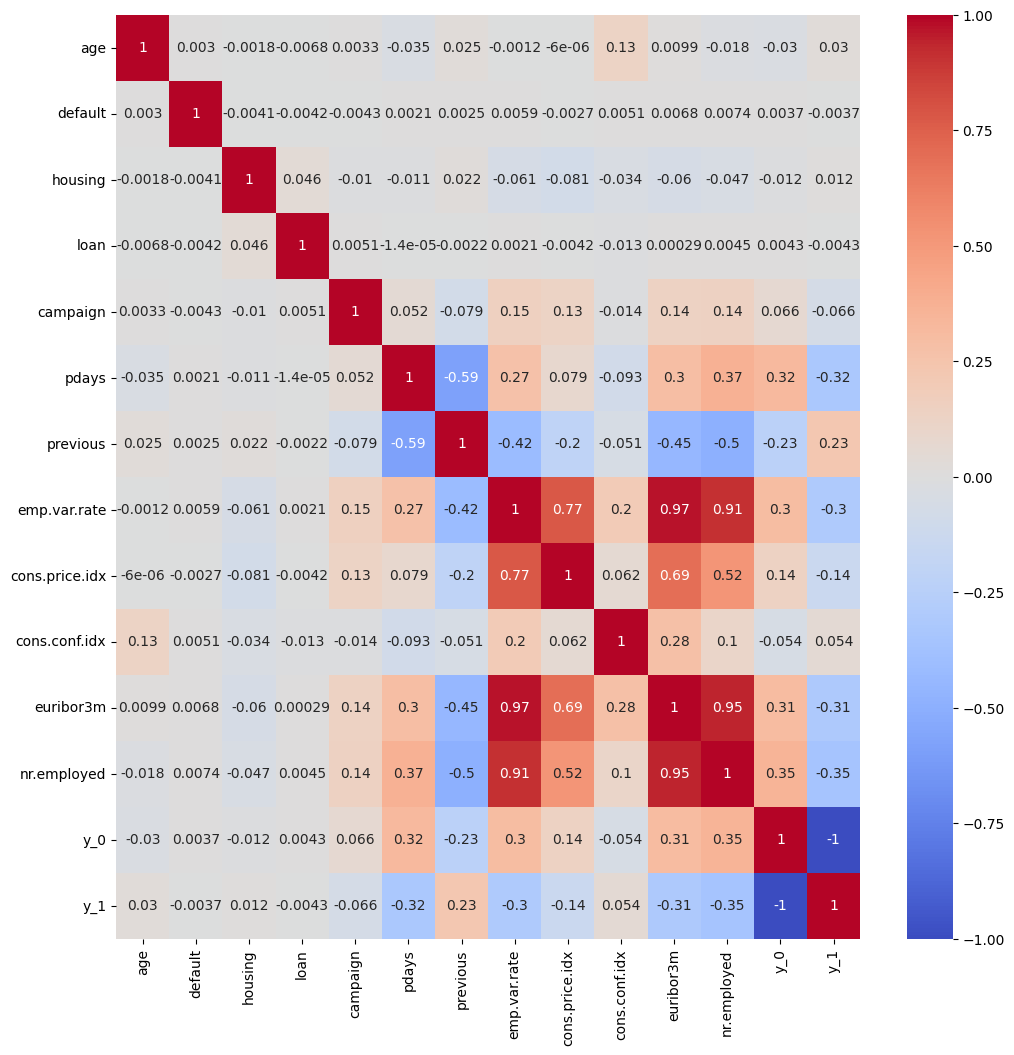

In [20]:
import seaborn as sns
corr = pd.get_dummies(bank, columns = ['y'])

# plot a heatmap of corr
plt.figure(figsize=(12,12))
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')


**> 0.2 correlation**

Negative correlation
- as pdays increases, the probability of subscribing to a term deposit decreases -> more frequent contact is good
- as employment rate increases, the chance of subscribing decreases -> lower employment is good
- as euribor 3m rate increases, the chance of subscribing decreases -> lower rates are better
- as the number of employees increases, the chance of subscribing decreaes -> lower employment is good

Positive correlation
- as number of contact increases, the probability of subscribing increases -> number of contact is good

#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

<Figure size 2000x2000 with 0 Axes>

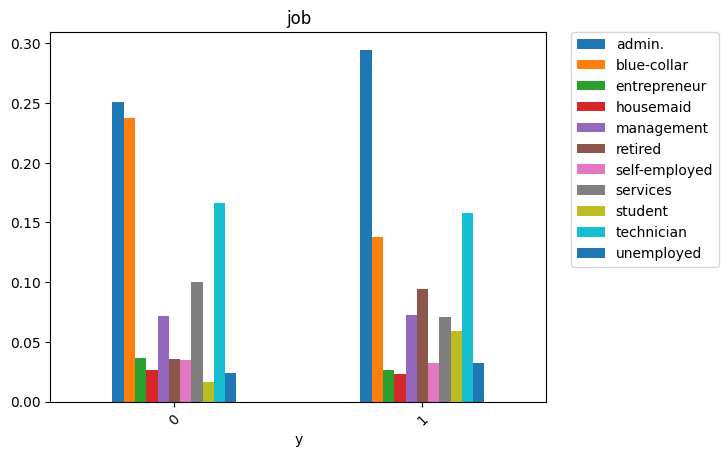

<Figure size 2000x2000 with 0 Axes>

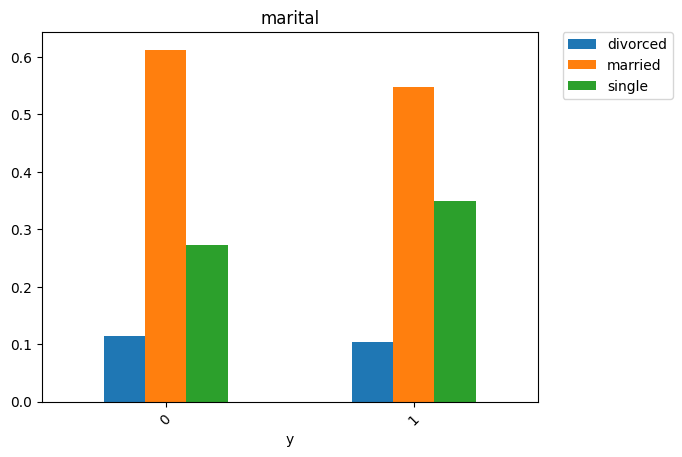

<Figure size 2000x2000 with 0 Axes>

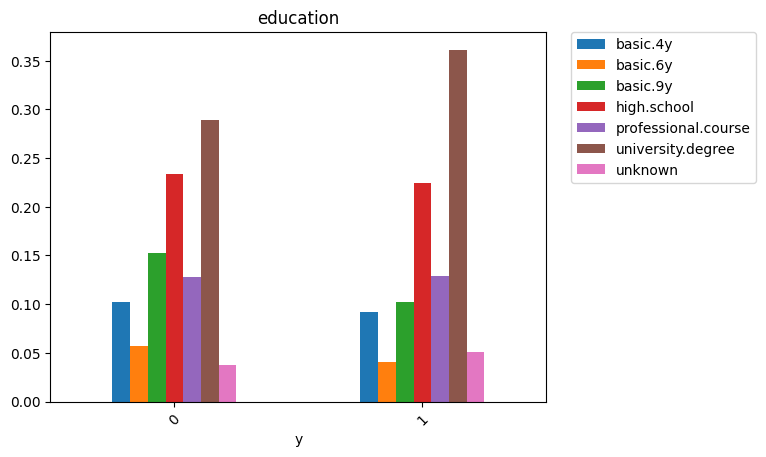

<Figure size 2000x2000 with 0 Axes>

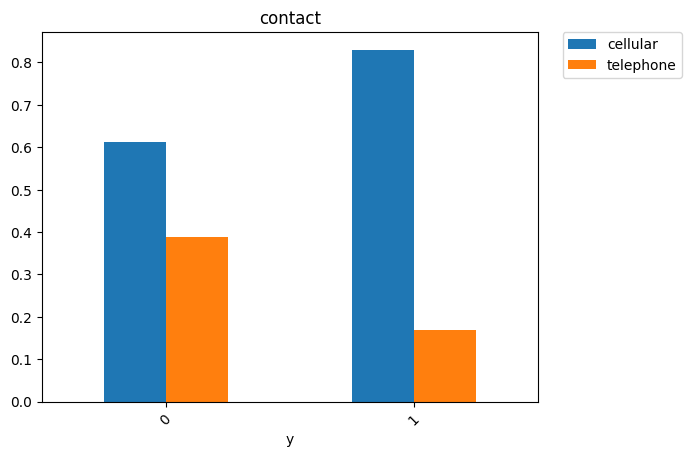

<Figure size 2000x2000 with 0 Axes>

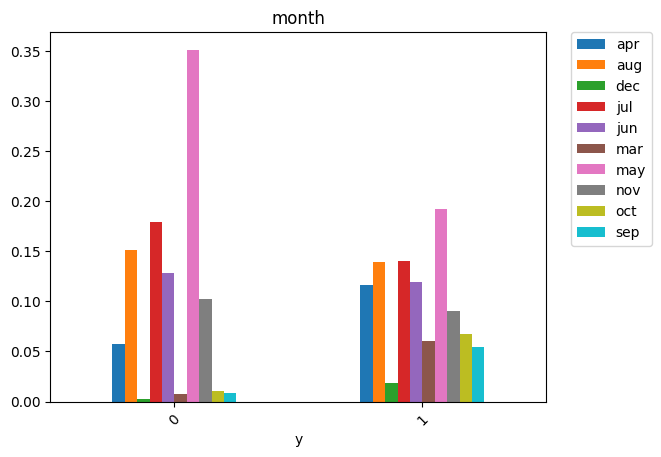

<Figure size 2000x2000 with 0 Axes>

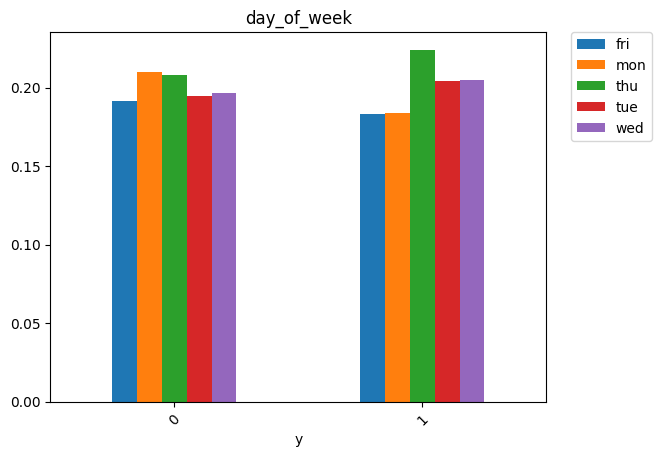

<Figure size 2000x2000 with 0 Axes>

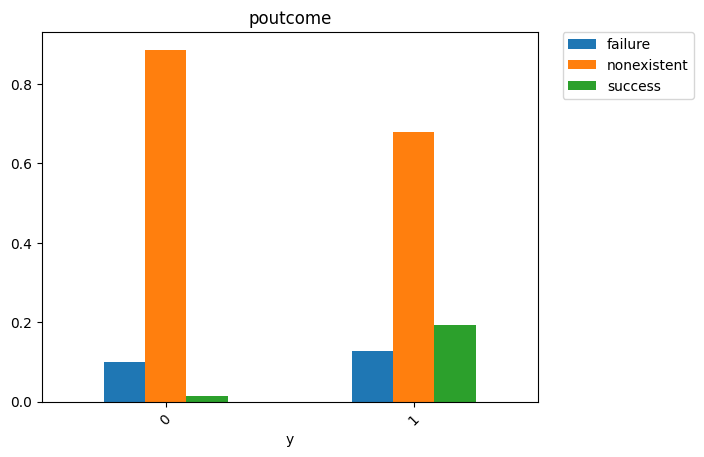

In [21]:
# using matplotlib plot bar charts of each group by
for col in categorical:
    plt.figure(figsize=(20,20))
    # plot bar chats of each group by
    bank.groupby('y')[col].value_counts(normalize=True).unstack().plot(kind='bar')
    # introduce color to differentiate the different categories in col
    plt.title(col)
    plt.xticks(rotation=45)
    # show the legend outside the graph
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()  

Strong features
- having a poutcome is better than not having one (means the customer was previously contacted in a previous marketing campaign)
- customers who are using cellular and not telephones seem more likely to subscribe
- customers who have a university degree seem more likely to subscribe
- admin, non-blue collar workers, retirees, non-services and students are more likely to subscribe

Less strong features
- may seems like a bad month to get someone to subscribe
- thursday, tuesday and wednesday seems like a good day to subscribe

#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

In [22]:
features = ['poutcome','contact','pdays','emp.var.rate','euribor3m','nr.employed','previous' ]

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [23]:
# dummify the categorical variables
model_df = pd.get_dummies(bank[features], columns=['poutcome','contact'], drop_first=True)

In [24]:
model_df.shape

(39785, 8)

In [25]:
bank['y'].shape

(39785,)

#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [26]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df, bank['y'], test_size=0.3, random_state=0)

In [27]:
# store the lenght of the training data set as a variable
length = len(X_train)

#### 3. Train a classifier on the training data

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# instantiate the model
rf = RandomForestClassifier()

# define the parameters
params = {'n_estimators': [50, 100, 150],
            'max_depth': np.arange(4,8),
            # 'min_samples_split': [round(length/20,0),round(length/15,0)],
            # 'min_samples_leaf': [round(length/40,0),round(length/20,0)]
            }

# instantiate the gridsearch
grid = GridSearchCV(rf, params, cv=5, scoring = 'f1')

# fit the model based on the secondary class precision
grid.fit(X_train, y_train==1)
y_pred = grid.predict(X_test)

# get the best parameters
print(grid.best_params_)

# get the best score
print(grid.best_score_)

# get the best estimator
print(grid.best_estimator_)

{'max_depth': 7, 'n_estimators': 50}
0.35288527220610033
RandomForestClassifier(max_depth=7, n_estimators=50)


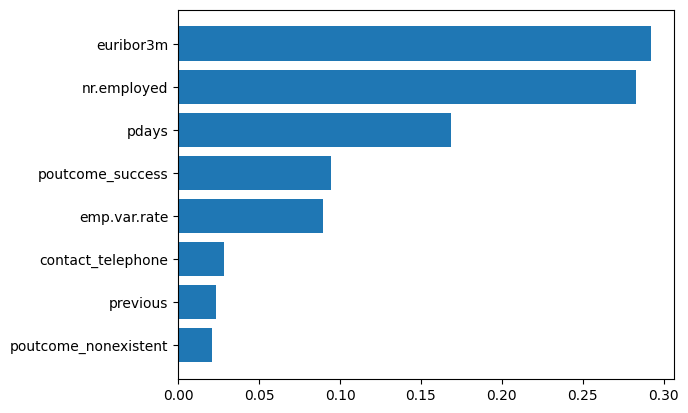

In [29]:
# show the most important features
# plt.figure(figsize=(10,20))
best = grid.best_estimator_
f_i = list(zip(model_df.columns,best.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

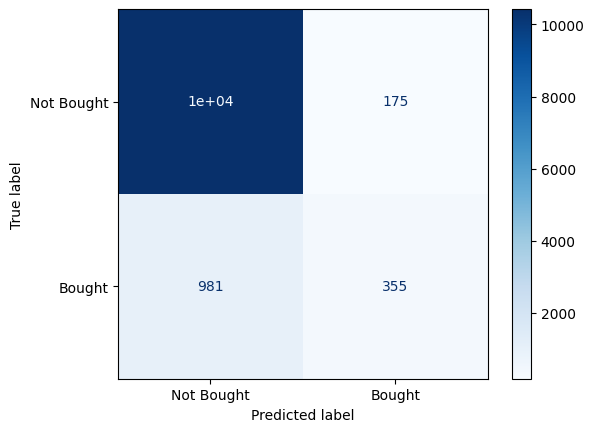

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(
    grid.best_estimator_,
    X_test,
    y_test,
    display_labels=['Not Bought','Bought'],
    cmap=plt.cm.Blues,
)
plt.show()

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

In [31]:
baseline = len(bank[bank['y']==0])/len(bank)
print(f'the baseline for the model accuracy should be {baseline*100:.2f}%')

the baseline for the model accuracy should be 88.73%


In [32]:
# display precision and recall of secondary class
from sklearn.metrics import classification_report
# import accuracy
from sklearn.metrics import accuracy_score

# overall accuracy
print(f'we beat the baseline accuracy model by {(accuracy_score(y_test, y_pred)-baseline)*100:.2f}%')
print()

we beat the baseline accuracy model by 1.58%



#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

---------------------------------------
ANS:

Taking the perspective of the secondary class

- A false positive means that actually the customer you predicted that was buying is actually not buying
- A false negative means a missed customer opportunity that you predicted as a not buying customer

There are a few considerations.

Does predicting a buying customer means significant cost is going to be spent?
- If there are significant extra efforts used, then we want to maximize the precision of the secondary class
- If there are no extra efforts and cost, then there is no harm in approaching all these potential buyers in the first place. However that would invalidate the whole exercise of creating this model since we can just approach all the customers anywa

How much loss in revenue is there for each customer?
- If there are significant loss in revenue due to us not contacting the customer, then we want to maximize recall of the secondary class.
- If however we have a situation where customers who want to buy our product will come looking for us anyway, then we are not as concerned about the recall.

Another consideration is the fact that we have an imbalanced class situation, so naturally the recall score for the model is going to be bad and the precision score is going to be better.

For this scenario it seems like we want to both minimize cost and maximize revenue at the same time, hence a good metric would be the F1 score for the secondary class, followed by recall, followed by precision and then finally accuracy.

---------------------------------------

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [33]:
print('Print metrics for minority class')
print(classification_report(y_test, y_pred, labels=[1]))

print('Print metrics for majority class')
print(classification_report(y_test, y_pred, labels=[0]))

Print metrics for minority class
              precision    recall  f1-score   support

           1       0.67      0.27      0.38      1336

   micro avg       0.67      0.27      0.38      1336
   macro avg       0.67      0.27      0.38      1336
weighted avg       0.67      0.27      0.38      1336

Print metrics for majority class
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10600

   micro avg       0.91      0.98      0.95     10600
   macro avg       0.91      0.98      0.95     10600
weighted avg       0.91      0.98      0.95     10600



In [34]:
pred = pd.DataFrame(y_pred, columns=['y_pred'])

In [47]:
total_df = pd.concat([X_test,y_test,pred],axis=1)

In [52]:
# export total_df to csv
total_df.to_csv('total_df.csv')

In [49]:
total_df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,pdays,emp.var.rate,euribor3m,nr.employed,previous,poutcome_nonexistent,poutcome_success,contact_telephone,y,y_pred
21045,999.0,1.4,4.964,5228.1,0.0,1.0,0.0,0.0,0.0,NaN
36755,999.0,-2.9,1.286,5076.2,0.0,1.0,0.0,0.0,0.0,NaN
29391,999.0,-1.8,1.405,5099.1,1.0,0.0,0.0,0.0,0.0,NaN
29841,999.0,-1.8,1.405,5099.1,1.0,0.0,0.0,0.0,0.0,NaN
38004,3.0,-3.4,0.788,5017.5,1.0,0.0,1.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
11929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
11930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
11932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
11934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [50]:

main_class = total_df['y'==0]

categorical = main_class.columns

# using matplotlib plot bar charts of each group by
for col in categorical:
    main_class[col].value_counts(normalize=True).plot(kind='bar')
    # introduce color to differentiate the different categories in col
    plt.title(col)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

KeyError: False

#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?